### **Steps that we have followed in this notebook**

1. Understanding the Problem Statement & Import Packages and Datasets.

2. Perform EDA (Exploratory Data Analysis)

3. Generating hypothesis and deriving insights from it (using EDA).

4. Explore the entire Data and get to know what each Column / Feature denotes.

5. Addressing Imbalance of Target Column in Dataset.

6. Split Entire Data set into Train and Validation Data with Predictors(Independent) & Target(Dependent).

7. We performed Data Scaling using StandardScaler

8. Create various ML Models for Binary Class Classification Problem

9. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "Recall" and Predict Traget "CARAVAN"

10. Comparing model predicted values with the target data set.

11. Results, Analyis and Conclusion using our evaluation metric "Recall" Score

### **Step1: Import all required libraries**

In [ ]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

### **Uploading train data set**

In [ ]:
from google.colab import files
uploaded_train = files.upload()

Saving tic_2000_train_data.csv to tic_2000_train_data.csv


In [ ]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded_train['tic_2000_train_data.csv']))

### **Uploading test data set**

In [ ]:
from google.colab import files
uploaded_test = files.upload()

Saving tic_2000_eval_data.csv to tic_2000_eval_data.csv


In [ ]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded_test['tic_2000_eval_data.csv']))

### **Uploading evaluation data set**

In [ ]:
from google.colab import files
uploaded_eval = files.upload()

Saving tic_2000_target_data.csv to tic_2000_target_data.csv


In [ ]:
import io
target_data = pd.read_csv(io.BytesIO(uploaded_eval['tic_2000_target_data.csv']))

In [ ]:
df = train_data.copy()

### **Step2: Checking the number of rows and columns in the train data set provided**

In [ ]:
#Check Shape of Data
print(train_data.shape)

(5822, 86)


### **Checking for any missing values in the train data set**

In [ ]:
# Ensure there are no missing values.
train_data.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

### **Check for Imbalance of Target Column in Datasets**

In [ ]:
LABELS = ["Not Buy Policy","Buys Policy"]

From the below plot, we can see that majority of the customers are not interested in buying a caravan insurance policy

Text(0, 0.5, 'Frequency')

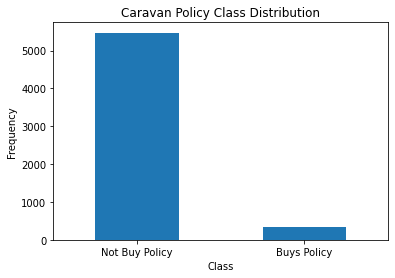

In [ ]:
count_classes = pd.value_counts(train_data['CARAVAN'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Caravan Policy Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

### **Step 3: Generating hypothesis and deriving insights from it (using EDA).**

### **Cross Sell Prediction**

As we have so many features (around 85 features) in our data, we are narrowing down our analysis using 17 fetaures by removing lower correlated features using correlation matrix and finding out their insights by generating Hypothesis and by using exploratory data analysis.

Before starting the data exploration to understand the relation between the independent features it is important to focus on Hypothesis Testing

**Hypothesis Testing is the first step we should take towards understanding the dataset and the business problem. The main aim of Hypothesis Testing is to give us a head-start towards understanding the problem.**

We came up with the following hypothesis while thinking about the problem.

**Let me state some hypotheses from our problem statement.**

1. **MGEMLEEF** -- Middle Aged persons (Frome age 20 to 50yrs) would be more interested in buying insurance policy than older age customers (age > 50yrs)
2. **ABRAND** -- Customers who purchase more fire policies tend to contribute more twoards buying caravan insurance
3. **ABYSTAND** -- Customers who have not purchased Social security Insurance policy tend to buy Caravan Insurance
4. **MOSHOOFD** -- Successful hedonists tend to buy insurance.
5. **MAANTHUI** -- Customer with avg no of houses less than 2 tend to buy caravan insurance
6. **MKOOPKLA** -- Customers who are mixed seniors tend to buy insurance
7. **MAUTO**: -- Customers with no car tend to buy insurance

### **Step 4: Explore the entire Data and get to know what each Column / Feature denotes.**

**Analysis On MGEMLEEF(Avg. Age) Feature**

**Hypothesis 1:**

Middle Aged persons (Frome age 20 to 50yrs) would be more interested in buying insurance policy than older age customers (age > 50yrs)

In [ ]:
df.MGEMLEEF.unique()

array([2, 3, 1, 4, 5, 6])

In [ ]:
age = {1:"20-30yrs",2 :"30-40yrs",3: "40-50yrs",4 : "50-60yrs",5:"60-70yrs",6: "70-80yrs"}

In [ ]:
df["MGEMLEEF"] = df["MGEMLEEF"].map(age)

**From the below graph we can Confirm our hypothesis that Customers in middle age group from (20-50yrs) of age tend to buy caravan policy than older group of customers**

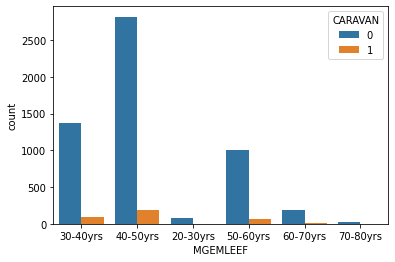

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="MGEMLEEF", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis 2**

**ABRAND** -- Customers tend to purchase more fire policies tend to contribute more towards buying caravan insurance

In [ ]:
df.ABRAND.unique()

array([1, 0, 2, 3, 5, 4, 7])

**From the below graph we can deny/reject our hypothesis and conclude that Customers who purchase only one fire policy have purchased the Caravan policy**

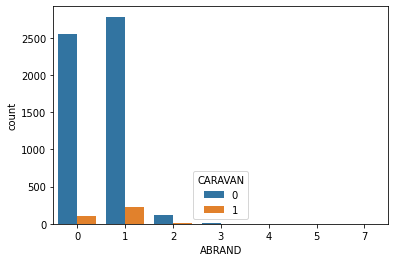

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="ABRAND", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis 3**

**ABYSTAND** -- Customers who have not purchased Social security Insurance policy tend to buy Caravan Insurance

In [ ]:
df.ABYSTAND.unique()

array([0, 1, 2])

**From the below graph we can accept our hypothesis that Customers who have not purchased social security insurance policy(0) have purchased the Caravan policy**

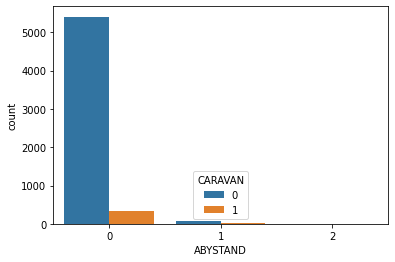

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="ABYSTAND", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis 4**

**MOSHOOFD** - Successful hedonists tend to buy caravan insurance policy

In [ ]:
df.MOSHOOFD.unique()

array([ 8,  3, 10,  5,  9,  7,  2,  1,  6,  4])

From the below graph we can reject our hypothesis as very less number of successful hedonists tend to buy caravan policy

In the above Pie chart, Customers maintype includes  10 labels. Customers belonging to  maintype 2(Driven Growers)& maintype 8(Family with grown ups)have purchase the policy

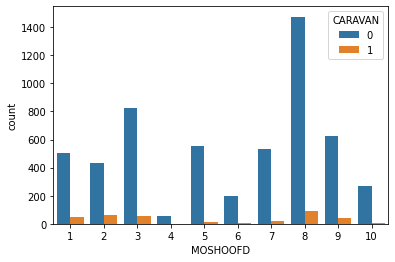

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="MOSHOOFD", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis 5**

Customer with avg no of houses less than 2 tend to buy caravan insurance

**From below graph we can confirm our hypothesis that Customers with less than 2 houses tend to buy caravan insurance policy**

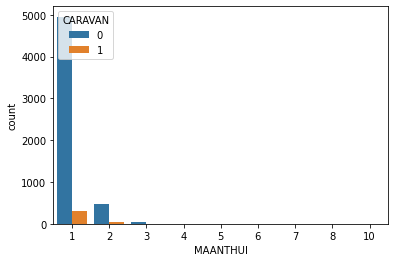

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="MAANTHUI", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis 6**

**MKOOPKLA** --  Customers who are Mixed seniors tend to buy caravan insurance policy

We can reject our hypothesis(ie mixed seniors tend to buy insurance policy) and confirm from below plot  **3rd** purchasing class High status seniors,**7th** Dinki's (double income no kids),**6** people and Career and childcare class have Purchased the caravan policy

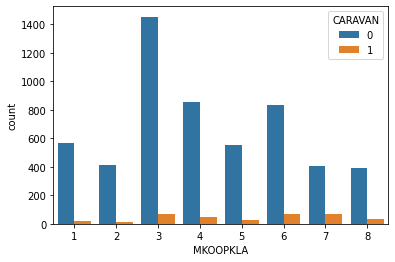

In [ ]:
# count plot along y axis
sns.countplot(data=df, x="MKOOPKLA", hue="CARAVAN")

# Show the plot
plt.show()

**Hypothesis - 7**

**PPERSAUT:** Customers who pay car policy premium averagely between 1000$-4999$  tend to buy caravan insurance policy

From below chart, we can confirm our Hypothesis that  Customers who pay car policy premium averagely from $1000 to $4999(6)  have purchased the Caravan policy

In [ ]:
df1 = train_data.copy()

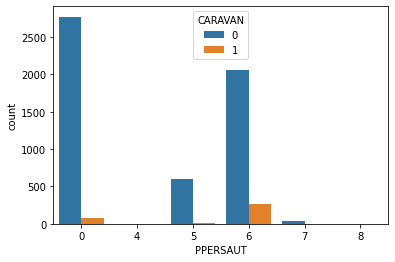

In [ ]:
# count plot along y axis
sns.countplot(data=train_data, orient='h', x="PPERSAUT", hue="CARAVAN")

# Show the plot
plt.show()

### **Step 5: Addressing Imbalance of Target Column**


### **Class Imbalance Using Oversampling/Upsampling**

In [ ]:
class_0 = train_data[train_data['CARAVAN']==0]
class_1 = train_data[train_data['CARAVAN']==1]

In [ ]:
print(class_0.shape,class_1.shape)

(5474, 86) (348, 86)


###**Oversampling**

In oversampling, minority class is oversampled at random or duplicate examples are added from the minority class (class1) inorder to match the majority class (class0)

Here the data points are selected randomly with replacement.

Now, we will be applying oversampling technique - one of the method to handle data imbalance in the data.

### **Why to apply oversampling technique to our data ?**

The ability of algorithm/model is always constrained by its ability to predict rare points.So in our problem, rare points are the class1 (a customer purchased a caravan policy).So we will be resampling the minority class1 datapoints to balance with the majority class(class0).

In [ ]:
df_minority_upsampled = resample(class_1,
                                 replace=True,     # sample with replacement
                                 n_samples=5474,    # to match majority class
                                 random_state=123) # reproducible results

### **oversampling the minority data (class-1) to get more samples and make both class1 and class0 balanced**

In [ ]:
final_df = pd.concat([class_0,df_minority_upsampled])
print(final_df.shape)

(10948, 86)


In [ ]:
X = final_df.drop(['CARAVAN'], axis=1)
y = final_df['CARAVAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Checking the correlation among all the variables wrt 'CARAVAN' variable which is our Target variable**

In [ ]:
train_data.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723,-0.069300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APLEZIER,-0.018162,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,...,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325,0.105700
AFIETS,-0.015774,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,...,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246,0.034144
AINBOED,-0.021087,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,...,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273,0.018026
ABYSTAND,-0.053718,-0.004166,0.028384,-0.014540,-0.051723,-0.004009,0.016658,0.010127,-0.027291,0.036569,...,-0.008693,0.114810,-0.007119,0.034854,-0.002698,0.026325,0.009246,0.021273,1.000000,0.066658


In [ ]:
train_data['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

###**Correlation Matrix**

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset.
It allows us to visualize how much (or how little) correlation exists between different variables. This is a very important step in for our analysis as we have a very huge number of features in our data set bold text

Based on the correlation matrix, we can see that out of 86 features that we have, by using the correlation values, we have selected 17 features whose correlation values are either closer to +1 or -1

### **Step 6: Split Entire Data set into Train and Validation Data with Predictors(Independent) & Target(Dependent).**

###**Removing Non Correlated Features and splitting the data set**

Including only the most correlated features

In [ ]:
col_knn = ['PPERSAUT', 'APERSAUT', 'MKOOPKLA', 'PWAPART', 'PBRAND', 'AWAPART', 'MINKGEM', 'MOPLHOOG', 'APLEZIER',
              'PPLEZIER', 'MHKOOP', 'MOPLLAAG', 'MINKM30', 'MHHUUR', 'MAUT0', 'MOSTYPE', 'MZFONDS']

### **Splitting the data set in to train/test - 80/20**

In [ ]:
# 80/20 train test split
train_df1, test_df1 = train_test_split(final_df, test_size=0.2, random_state=1)
print('Training set:', train_df1.shape, 'Test set:', test_df1.shape)

Training set: (8758, 86) Test set: (2190, 86)


In [ ]:
# creat list of that are our predictors (X), and outcome (y)
y = 'CARAVAN'
X = ['PPERSAUT', 'APERSAUT', 'MKOOPKLA', 'PWAPART', 'PBRAND', 'AWAPART', 'MINKGEM', 'MOPLHOOG', 'APLEZIER',
              'PPLEZIER', 'MHKOOP', 'MOPLLAAG', 'MINKM30', 'MHHUUR', 'MAUT0', 'MOSTYPE', 'MZFONDS']

### **Step 7: Performing Data Scaling using StandardScaler**
Predicting models are sensitive to differences in scale; therefore, we should begin by eliminating any differences in scale between the predictors/features. To accomplish this, we will standardize the values of each variable.

We will use the popular sklearn library's 'standard scaler' to accomplish this. This library contains many of the common functions we require when conducting analytics. The standard scaler function will standardize our variables. To achieve this, we will first need to train the scaler on the training data and then apply this trained scaler to standardize both the training and validation sets.



**Create a standard scaler and fit it to the training set of predictors**

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_df1[X])

StandardScaler()

**Transform the predictors of training and test**

In [ ]:
X_train1= scaler.transform(train_df1[X])
y_train1 = train_df1[y]
X_test1 = scaler.transform(test_df1[X])
y_test1 = test_df1[y]

### **Step 8: Creating various ML Models for Binary Class Classification Problem**

**Model 1 - KNN (Hyperparameter Tuning - Grid Search) with recall as evaluation metric**

In [ ]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,15,2)),
    'weights': ['uniform','distance'], #added weights parameter
    'metric': ['euclidean', 'cosine','manhattan']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(X_train1,y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)
bestRecallKnn = gridSearch.best_estimator_

recall score:  1.0
parameters:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [ ]:
gridSearch.fit(X_train1,y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
prediction1 = gridSearch.predict(X_test1)

In [ ]:
print(classification_report(y_test1, prediction1))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1083
           1       0.81      1.00      0.89      1107

    accuracy                           0.88      2190
   macro avg       0.90      0.88      0.88      2190
weighted avg       0.90      0.88      0.88      2190



In [ ]:
col_knn = ['PPERSAUT', 'APERSAUT', 'MKOOPKLA', 'PWAPART', 'PBRAND', 'AWAPART', 'MINKGEM', 'MOPLHOOG', 'APLEZIER',
              'PPLEZIER', 'MHKOOP', 'MOPLLAAG', 'MINKM30', 'MHHUUR', 'MAUT0', 'MOSTYPE', 'MZFONDS']

predict = gridSearch.predict(test_data[col_knn])

In [ ]:
predict.shape,target_data.shape

((4000,), (4000, 1))

In [ ]:
print(classification_report(predict,target_data))

              precision    recall  f1-score   support

           0       0.45      0.96      0.61      1754
           1       0.71      0.08      0.14      2246

    accuracy                           0.46      4000
   macro avg       0.58      0.52      0.37      4000
weighted avg       0.60      0.46      0.34      4000



In [ ]:
cf_knn = confusion_matrix(target_data,predict)

**TRUE POSITIVE:** 170 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 1686 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 2076 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  68 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

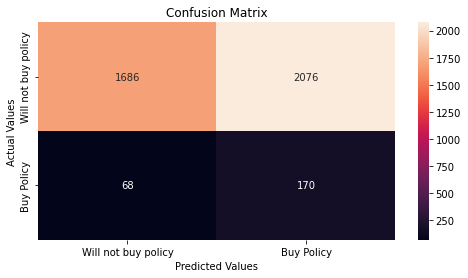

In [ ]:
cm_df = pd.DataFrame(cf_knn, index = ['Will not buy policy','Buy Policy'], columns = ['Will not buy policy','Buy Policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

**Predictions using Target data**

In [ ]:
knn_grid1 = pd.DataFrame(predict, columns = ['KNN_Prediction'])

In [ ]:
knn_grid1['KNN_Pred'] = np.where(knn_grid1['KNN_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
knn_grid1.head(3)

,KNN_Prediction,KNN_Pred
0,1,False
1,1,True
2,1,False


In [ ]:
knn_grid1.value_counts()

KNN_Prediction  KNN_Pred
1               False       2076
0               True        1686
1               True         170
0               False         68
dtype: int64

**Saving the predictions to an csv file for convenience**

In [ ]:
knn_grid = pd.DataFrame(predict).to_csv("./knngrid.csv")

**Model 2 : Naive Bayes Classifier**

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train1, y_train1)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test1)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
predict_nb = gnb.predict(test_data[col_knn])

In [ ]:
print(classification_report(predict_nb,target_data))

              precision    recall  f1-score   support

           0       0.11      0.96      0.20       436
           1       0.93      0.06      0.12      3564

    accuracy                           0.16      4000
   macro avg       0.52      0.51      0.16      4000
weighted avg       0.84      0.16      0.13      4000



In [ ]:
confusion_naive = confusion_matrix(target_data, predict_nb)

In [ ]:
confusion_naive

array([[ 420, 3342],
       [  16,  222]])

**TRUE POSITIVE:** 222 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 420 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 3342 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  16 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

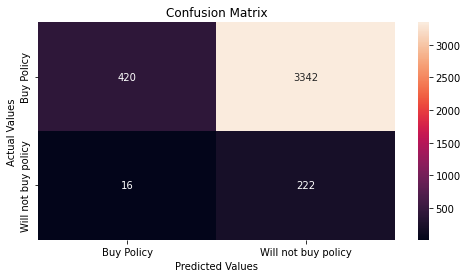

In [ ]:
cm_df = pd.DataFrame(confusion_naive, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

**Predictions using Target data**

In [ ]:
nb_predictions = pd.DataFrame(predict_nb,columns = ['NB_Prediction'])

In [ ]:
nb_predictions

,NB_Prediction
0,1
1,1
2,1
3,1
4,1
...,...
3995,1
3996,1
3997,1
3998,1


In [ ]:
nb_predictions['NB_Pred'] = np.where(nb_predictions['NB_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
nb_predictions.value_counts()

NB_Prediction  NB_Pred
1              False      3342
0              True        420
1              True        222
0              False        16
dtype: int64

**Model 3 : Decision Tree Classifier using Hyper Parameter Tuning (Grid Search and Random Search)**

In [ ]:
random_seed = 1
np.random.seed(random_seed)

**Grid Search**

In [ ]:
plus_minus = 10 # change this to 10-15 when doing a final run. this current value is for testing
increment = 2


param_grid = {
    'max_depth': [2,5,10,20,30,40,50],
    'min_samples_split': [357,361,365,369,373,377],
    'min_samples_leaf' : [59,63,67,71,79],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'max_leaf_nodes' : [633,637,641,647,651,655],
    'criterion':['gini','entropy']
}

In [ ]:
best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed),
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(X_train1, y_train1)

In [ ]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 633, 'min_impurity_decrease': 0, 'min_samples_leaf': 59, 'min_samples_split': 357}


In [ ]:
X_train2= train_df1[X]
y_train2 = train_df1[y]
X_test2 = test_df1[X]
y_test2 = test_df1[y]

In [ ]:
best_grid_search_model1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed),
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model1 = best_grid_search_model1.fit(X_train2, y_train2)

In [ ]:
prediction1 = best_grid_search_model.predict(X_test2)

In [ ]:
predict_dtree2 = best_grid_search_model.predict(test_data[col_knn])

NameError: ignored

In [ ]:
print(classification_report(predict_dtree2,target_data))

In [ ]:
prediction1 = best_grid_search_model.predict(X_test1)

In [ ]:
print(classification_report(y_test1, prediction1))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1083
           1       0.68      0.77      0.72      1107

    accuracy                           0.70      2190
   macro avg       0.71      0.70      0.70      2190
weighted avg       0.71      0.70      0.70      2190



In [ ]:
predict_dtree = best_grid_search_model.predict(test_data[col_knn])

In [ ]:
predict_dtree.shape,target_data.shape

((4000,), (4000, 1))

In [ ]:
print(classification_report(predict_dtree,target_data))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      1980
           1       0.72      0.09      0.15      2020

    accuracy                           0.52      4000
   macro avg       0.62      0.53      0.41      4000
weighted avg       0.62      0.52      0.41      4000



In [ ]:
confusion_dtree_grid = confusion_matrix(target_data, predict_dtree)

**TRUE POSITIVE:** 170 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 420 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 3342 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  16 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

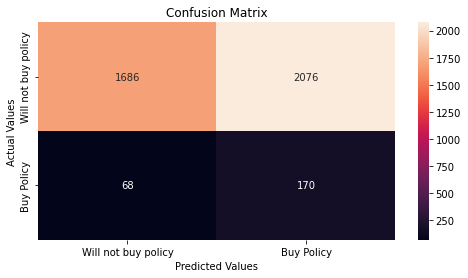

In [ ]:
cm_dtre = pd.DataFrame(confusion_dtree_grid, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

**Grid Search Predictions on Target Data**

In [ ]:
dtree_grid1 = pd.DataFrame(predict_dtree, columns = ['DTREE_Prediction'])

In [ ]:
dtree_grid1

,DTREE_Prediction
0,0
1,1
2,1
3,1
4,0
...,...
3995,1
3996,1
3997,1
3998,1


In [ ]:
dtree_grid1['DTREE_Pred'] = np.where(dtree_grid1['DTREE_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
dtree_grid1.value_counts()

DTREE_Prediction  DTREE_Pred
0                 True          1914
1                 False         1848
                  True           172
0                 False           66
dtype: int64

**Saving the predictions to an csv file for convenience**

In [ ]:
dtree_grid = pd.DataFrame(predict_dtree).to_csv("./dtreegrid.csv")

In [ ]:
dtree_grid

**Random Search**

In [ ]:
dtree_default = DecisionTreeClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model_dtree = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed),
        scoring='recall',
        param_distributions=param_grid,
        n_iter = 10_000,
        cv=10,
        verbose=0,
        n_jobs = -1
    )
best_random_search_model_dtree = best_random_search_model_dtree.fit(X_train1, y_train1)

In [ ]:
random_search_best_params = best_random_search_model_dtree.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 369, 'min_samples_leaf': 71, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 651, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
prediction2_dtree_random = best_random_search_model_dtree.predict(X_test1)

In [ ]:
print(classification_report(y_test1, prediction2_dtree_random))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1083
           1       0.68      0.77      0.72      1107

    accuracy                           0.70      2190
   macro avg       0.71      0.70      0.70      2190
weighted avg       0.71      0.70      0.70      2190



**Random Seach Dtree Predictions on the Target Data**

In [ ]:
predict2_dtree_random_test = best_random_search_model_dtree.predict(test_data[col_knn])

In [ ]:
predict2_dtree_random_test.shape,target_data.shape

((4000,), (4000, 1))

In [ ]:
print(classification_report(predict2_dtree_random_test,target_data))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      1980
           1       0.72      0.09      0.15      2020

    accuracy                           0.52      4000
   macro avg       0.62      0.53      0.41      4000
weighted avg       0.62      0.52      0.41      4000



In [ ]:
cf_dtree = confusion_matrix(predict2_dtree_random_test,target_data)

**TRUE POSITIVE:** 172 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 1914 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 66 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  1848 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

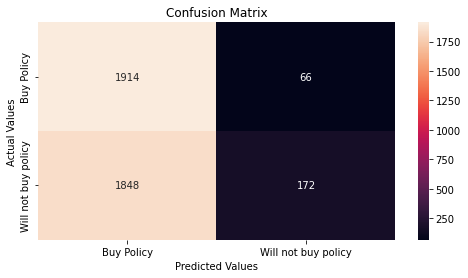

In [ ]:
cm_dtree = pd.DataFrame(cf_dtree, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_dtree, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dtree_grid2_random = pd.DataFrame(predict2_dtree_random_test, columns = ['DTREE_Random_Prediction'])

In [ ]:
dtree_grid2_random['DTREE_Pred'] = np.where(dtree_grid2_random['DTREE_Random_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
dtree_grid2_random.value_counts()

DTREE_Random_Prediction  DTREE_Pred
0                        True          1914
1                        False         1848
                         True           172
0                        False           66
dtype: int64

**Partioning Training and Test Data without standardization for boosting algorithms**

In [ ]:
X_train2= train_df1[X]
y_train2 = train_df1[y]
X_test2 = test_df1[X]
y_test2 = test_df1[y]

**Model 4: Random Forest**

In [ ]:
rf1= RandomForestClassifier(random_state=random_seed)
rf1.fit(X_train2, y_train2)

RandomForestClassifier(random_state=1)

**Random Forest Predictions on the target data**

In [ ]:
rf1_predict = rf1.predict(test_data[col_knn])

In [ ]:
print(classification_report(rf1_predict,target_data))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3822
           1       0.13      0.17      0.15       178

    accuracy                           0.91      4000
   macro avg       0.55      0.56      0.55      4000
weighted avg       0.92      0.91      0.92      4000



In [ ]:
cf_rf = confusion_matrix(rf1_predict,target_data)

**TRUE POSITIVE:** 31 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 3615 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 207 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  147 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

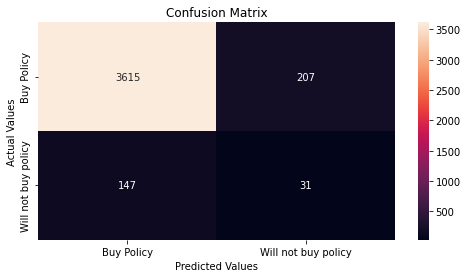

In [ ]:
cm_rf = pd.DataFrame(cf_rf, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_rf, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf1_pr = pd.DataFrame(rf1_predict, columns = ['RF_Prediction'])

In [ ]:
rf1_pr['RF_Prediction1'] = np.where(rf1_pr['RF_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
rf1_pr.value_counts()

RF_Prediction  RF_Prediction1
0              True              3615
               False              207
1              False              147
               True                31
dtype: int64

**Model 5: Gradient Boosting Classifier using Hyperparameter Tuned (GridSearch)**


In [ ]:
learning_rate =  [0.01, 0.1, 1.0]

n_estimators = [10,20,50]

criterion = ['friedman_mse', 'mse']

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
# default = 1
min_samples_leaf = [2,5,7,11]

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [10,90,150]

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [0.0, 0.01, 0.001]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None
max_leaf_nodes = [2,10,20]

# Create the random grid
param_grid_gboost = {
                      'n_estimators': n_estimators,
                      'criterion': criterion,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                       'max_depth': max_depth,
                     'min_impurity_decrease' : min_impurity_decrease,
                      'max_leaf_nodes' : max_leaf_nodes }

In [ ]:
best_grid_search_model_gboost = GridSearchCV(estimator=GradientBoostingClassifier(random_state=random_seed),
                                    scoring='recall', param_grid=param_grid_gboost, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model_gboost = best_grid_search_model_gboost.fit(X_train2, y_train2)

In [ ]:
print('Best parameters found: ', best_grid_search_model_gboost.best_params_)

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 90, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 50}


**Grid Search Predictions on Target Data**

In [ ]:
predict_gb = best_grid_search_model_gboost.predict(test_data[col_knn])

In [ ]:
predict_gb.shape,target_data.shape

((4000,), (4000, 1))

In [ ]:
print(classification_report(predict_gb,target_data))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3158
           1       0.46      0.13      0.20       842

    accuracy                           0.78      4000
   macro avg       0.63      0.54      0.54      4000
weighted avg       0.73      0.78      0.73      4000



In [ ]:
cf_gb = confusion_matrix(predict_gb,target_data)

**TRUE POSITIVE:** 109 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 3029 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 129 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  733 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

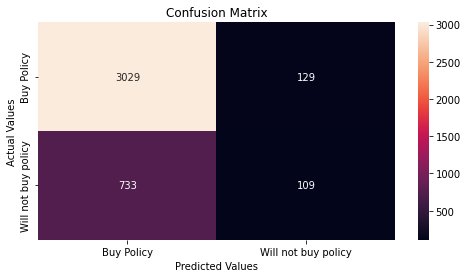

In [ ]:
cm_gb = pd.DataFrame(cf_gb, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_gb, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb1 = pd.DataFrame(predict_gb, columns = ['GB_Prediction'])

In [ ]:
gb1['GB_Prediction1'] = np.where(gb1['GB_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
gb1.value_counts()

GB_Prediction  GB_Prediction1
0              True              3029
1              False              733
0              False              129
1              True               109
dtype: int64

**Model 6: XGBoost Classifier**

In [ ]:
gb_default=XGBClassifier(random_state=random_seed)

In [ ]:
gb_default.fit(X_train2, y_train2)

XGBClassifier(random_state=1)

**Predictions on the Target Data**

In [ ]:
predict_xgb = gb_default.predict(test_data[col_knn])

In [ ]:
print(classification_report(predict_xgb,target_data))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2942
           1       0.53      0.12      0.20      1058

    accuracy                           0.74      4000
   macro avg       0.64      0.54      0.52      4000
weighted avg       0.69      0.74      0.67      4000



In [ ]:
cf_xgb = confusion_matrix(predict_xgb,target_data)

**TRUE POSITIVE:** 127 Customers are likely to buy an insurance policy and model predicted as customers are likely to buy an insurance policy

**TRUE NEGATIVE:** 2831 Customers who are interested in buying a caravan insurance policy, but the model predicted customers are not interested in buying the policy.

**FALSE POSITIVE:** 111 Customers who are not interested in buying the policy and model predicted as Customers are interested in buying the policy.

**FALSE NEGATIVE:**  931 Customers who are interested to buy an insurance policy and the model predicted customers do not buy the insurance policy.

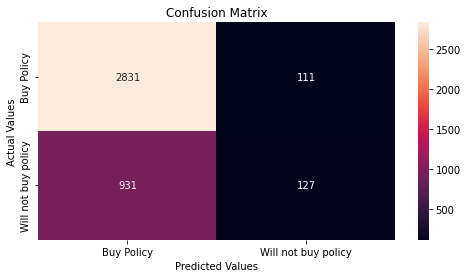

In [ ]:
cm_xgb = pd.DataFrame(cf_xgb, index = ['Buy Policy','Will not buy policy'], columns = ['Buy Policy','Will not buy policy'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_xgb, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
xgb1 = pd.DataFrame(predict_xgb, columns = ['XGB_Prediction'])

In [ ]:
xgb1['XGB_Prediction1'] = np.where(xgb1['XGB_Prediction'] == target_data['Target'], 'True', 'False')

In [ ]:
xgb1.value_counts()

XGB_Prediction  XGB_Prediction1
0               True               2831
1               False               931
                True                127
0               False               111
dtype: int64

### **Analysis and Conclusion**

#### **Summary of evaluation metrics of all models**

Below are the results generated by all the applied machine learning models((on class-I which we are predicting the customers who are likely to take insurance)).

**KNN-K NEAREST NEIGHBOUR**(Hyperparameter Tuning - Grid Search)

      a.Accuracy-  46%
      b.Recall Score- 8%
      c.Precision Score- 71%
      d.F1 Score- 14%
      e.Predicted customers who are likely to purchase insurance policy - 170



**Naive Bayes**

      a.Accuracy- 16%
      b.Recall Score- 6%
      c.Precision Score- 93%
      d.F1 Score- 12%
      e.Predicted customers who are likely to purchase insurance policy - 222


**Decision Tree classifer**(Hyperparameter Tuning - Grid Search)   
        
      a.Accuracy- 52%
      b.Recall Score- 9%
      c.Precision Score- 72%
      d.F1 Score- 15%
      e.Predicted customers who are likely to purchase insurance policy - 172

**Random Forest classifer**

      a.Accuracy- 91%
      b.Recall Score- 17%
      c.Precision Score- 13%
      d.F1 Score- 15%
      e.Predicted customers who are likely to purchase insurance policy - 31

**Gradient Boosting classifer** (Hyperparameter Tuning - Grid Search)

      a.Accuracy- 78%
      b.Recall Score- 13%
      c.Precision Score- 46%
      d.F1 Score- 20%
      e.Predicted customers who are likely to purchase insurance policy - 109

**XG-BOOST classifer**

      a.Accuracy- 74%
      b.Recall Score- 12%
      c.Precision Score- 53%
      d.F1 Score- 20%
      e.Predicted customers who are likely to purchase insurance policy - 127

**Model Consideration using metrics** -   

**False Positive**:
Here the customers are not interested in buying the insurance policy, but the model predicted as customers are interested in buying the policy.

Huge investments are involved in promoting insurance company policies using email marketing. The marketing teams will target customers who are not really interested in buying the policy, ultimately leading to a waste of both time and money.  

**False Negative**:
Here the customers are interested to buy insurance policies, but the model predicted customers do not buy the insurance policy.

As a result, the insurance company suffers loss because our model is unable to predict the set of customers who are interested and will eventually lose more of their customers.

In order to maintain customer advocacy and curb losses, we prefer false negatives over false positives.

As False positives have less loss when compared with False Negatives, we will use **Recall** as our evaluation metric.  

**Note** -  We can consider the model with good recall value as the best fit for our data set selected. In this case, the best model is Naive Bayes Classifier

Based on the above values, we can say that the order of number of predicting customers who are interested in purchasing a policy correctly  is as follows -

Naive Bayes > Decision Tree classifer > KNN-K Nearest Neighbour > XG-BOOST classifer > Gradient Boosting classifer > Random Forest classifer


Based on various models that we have applied, we consider Naive Bayes Model as the best model as it was able to predict 222 out of 238 customer instances who tend to buy caravan policy from our test set.

In our analysis of data set, we observed there are 86 attributes. In order to understand more about the features, we have applied corelelation matrix on the dataset. We know that in the corelation matrix, if the values are either closer to +1 or -1, we can consider them to have a significant impact on our target variable. Therefore, based on the correlation matrix, we have considered 17 out of 86 features for our analysis.

**Findings based on research** -   
Our Model describes a typical caravan insurance policy buyer as:
1. Customers who purchase more fire policies tend to contribute more towards buying caravan insurance
2. Customers whose avg no of houses is less than 2 tend to contribute more towards buying caravan insurance
3. Customers whose income is less than 30,000$ and live in rented house tend to contribute more towards buying caravan insurance
4. Customers who purchased more no of car policies tend to contribute more towards buying caravan insurance